<h1>Анализ данных в курсовой по истории России 20 века</h1>
<br>
<b>Тема</b>: статистический анализ периодики журнала "Безбожник"("Безбожник у станка") 1923-1930 годов<br>    
<b>Проблема</b>: отражение основных направлений антирелигиозной периодики в 1920-е годы<br>
<b>Объект</b>: антирелигиозная политика большевиков в периода НЭПа<br>
<b>Предмет</b>: иллюстрации и тексты журнала "Безбожник"("Безбожник у станка") в 1920-е годы<br>
    
Введение 
        <br><pre>    Среди множество советских инициатив советской власти в ранние годы своего существования было не мало амбициозных проектов, направленных именно на реализацию программы коммунистического общественного строительства (например, новая архитектура или повсеместное распространение авангардного искусства). Одним из таких направлений была антирелигиозная пропаганда. С антирелигиозной пропагандой сложилась достаточно непростая ситуация: государство не создало никаких государственных органов для осуществления антирелигиозной пропаганды, однако самая антирелигиозная пропаганда была тесно связана с государством. Самой значимой организацией, осуществлявшей антирелигиозную пропаганду, был Союз воинствующих безбожников (далее СВБ), образованный в 1925 году. СВБ занимался организацией антирелигиозного-просветительской деятельности в СССР. Основой его деятельности было издание периодики: газета "Безбожник", журналы "Безбожный крокодил", "Безбожник", "Атеист", "Антирелигиозник" и некоторых других. Для данной работы выбран именно журнал "Безбожник", так как он был направлен на работу с массами и при этом содержит в равной степени значимое количество текста и иллюстраций. Благодаря материалам журнала можно проследить направление самой пропагандисткой политики. В журнале "Антирелигиозник" изложены теоритические и методологические основы работы членов Союза воинствующих безбожников, но он не отражает того, как происходили изменения в содержании того, что именно пытались донести населению редакторы журанла. 
    Таким образом, основной вопрос, на который я попытаюсь ответить в этой работе: какие тенденции отражает содержание журнала "Безбожник" в 1920-е годы?
 
 </pre>

Имеется заполенная csv-таблица с логическими значениями полей(+/-) пока еще только за 1923 год. Категории таблицы отражают различные темы или иллюстрации, упомянутые или изображенные в конкретном номере. Первоначальная задача - попробуем визуализировать основные тенденции за заполненный период.

In [125]:
import csv
from math import sqrt


entries = []

with open("Bezbozhnik.csv") as csvfile:
    plots = csv.reader(csvfile, delimiter=",")
    plotsLS = [i for i in plots] # нужен список, так как _csvfile не работает с методами списков
    for row in plotsLS[1::]:
        entries.append(row.count("+"))
            
    
mean = sum(entries) // len(entries)
dispertion_not_devided_list = list(map(lambda x: abs(x - mean), entries))
average_deviation = sqrt(sum(dispertion_not_devided_list)/len(entries))

print("Среднее отклонение:", round(average_deviation))


Среднее отклонение: 2


Таким образом, можно сделать промежуточный вывод, что в 1923-м году состав журналов был в общем счете примерно однороден - нет сильного отклонения даже если учесть, что в таблицу включены две пустые строки и однак почти не заполненная.

Чтобы проверить этот вывод построим график количества плюсов в каждой категории. Для этого воспользуемся библиотекой matplotlib.

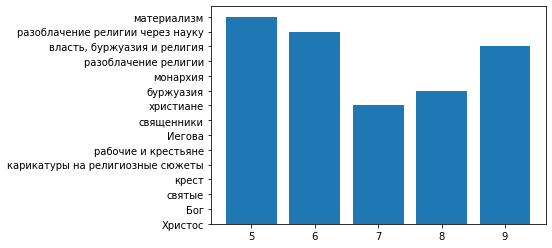

9 Христос 7 Бог 9 святые 6 крест 6 карикатуры на религиозные сюжеты 9 рабочие и крестьяне 6 Иегова 8 священники 7 христиане 8 буржуазия 6 монархия 9 разоблачение религии 9 власть, буржуазия и религия 6 разоблачение религии через науку 5 материализм
41 15


In [88]:
import csv
from matplotlib import pyplot
from itertools import islice

x_row = []

with open("Bezbozhnik.csv") as csvfile:
    plots = csv.reader(csvfile, delimiter=",")
    plotsLS = [i for i in plots]
    new_tables = []
    for i in range(len(plotsLS[0])):
        for j in range(len(plotsLS)):
            new_tables.append(plotsLS[j][i])
    for i in range(len(plotsLS[0])):
        x_row.append("".join(islice(new_tables, i * 13, i * 13 + 13)))
            
    

x_row.pop(0)
x_row.pop(0)
x_row.pop(1) # категории год, выпуск и реклама сейчас не нужны

names = [] # готовим данные для гистограммы, оптимальнее способа решить эту задачу найти не удалось
for i in x_row:
    names.append(i.replace("-", "").replace("+", ""))
values = []
for i in x_row:
    values.append(i.count("+"))

valuable = []

for i in range(len(values)):
    if values[i] > 4:
        valuable.append(values[i])
        valuable.append(names[i])
    
pyplot.subplot() # так как нормально читать диграмму не получится, сократим количество элементов
pyplot.bar(valuable[0::2], valuable[1::2])
pyplot.show()

print(*valuable)
print(len(names), len(valuable)//2)

Таким образом, получается выделить 15 из 41 самых часто встречающихся категорий в публикациях за 1923 год. Здесь можно отметить несколько неожиданных тенденций. Тут следует отметить, что разоблачение религии - разбор истории религии или ее сути, но не упомнинание о вскрытии мощей.
1. Иегова упоминается почти так же часто как Бог -> важность евреев в новой стране.
2. Среди часто упоминаемых: крест, священники, Христос, христиане -> самые понятные простому русскому человеку категории.
3. Просветительские и политические элементы представлены в малом количестве -> категории феминистические темы, медицина и наука, разоблачение таинств, свастика (индийская свастика здесь не учтена, учитывается только нацисткая свастика), теория эволюции, карикатуры на религиозные сюжеты сюда не попали в график встречаемости больше 4 раз.